In [2]:
# Understanding the Data Set 
# EDA
# Cleaning the Data (Handling missing values and all that stuff)
# Splitting the data 
# Modeling the data 
# Checking for better accuracy 
# Finally applying it on test data set that has highest accuracy. 

import numpy as np 
import pandas as pd 
import seaborn as sns 

In [3]:
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

# Uploading a csv file from the system 

In [4]:
train=pd.read_csv("train_loanprediction.csv")
test=pd.read_csv("test_loanprediction.csv")

In [5]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory Data  Analysis 

In [7]:
# Before this I am creating a copy of the train and test 
train1 = train.copy()
test1 = test.copy()

In [8]:
# Now we are checking the data types of each column for training data set 
train1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#  Same as for test data set 
test1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [10]:
# To know the number of rows and columns 
train1.shape 

(614, 13)

In [11]:
# it implies that there are 614 rows and 13 columns 
# lET'S CHECK FOR TEST DATA SET 
test1.shape

(367, 12)

In [11]:
# Hence this data set is relatively smaller when compared to Kaggle Data Sets. Now I am checking the number of dimensions.  
train1.ndim

2

In [12]:
# Now I am checking the number of values in each column 
train1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
# To know the percentage of number of males and number of number of females. 
train1['Gender'].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [9]:
# We observe that most of the them (81% ) are male 
# We observe that even though total count is supposed to be 614 but it is actually 489+112 = 601... hence there are some missing values 
train1['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
# We observe that 65% are married 
# Similarly I am checking for all other categories 

In [15]:
train1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
train1['Dependents'].value_counts(normalize = True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [17]:
train1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
train1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
train1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [13]:
train1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# PLOTTING THE GRAPHS THAT HAS A BETTER VISULAISATION 

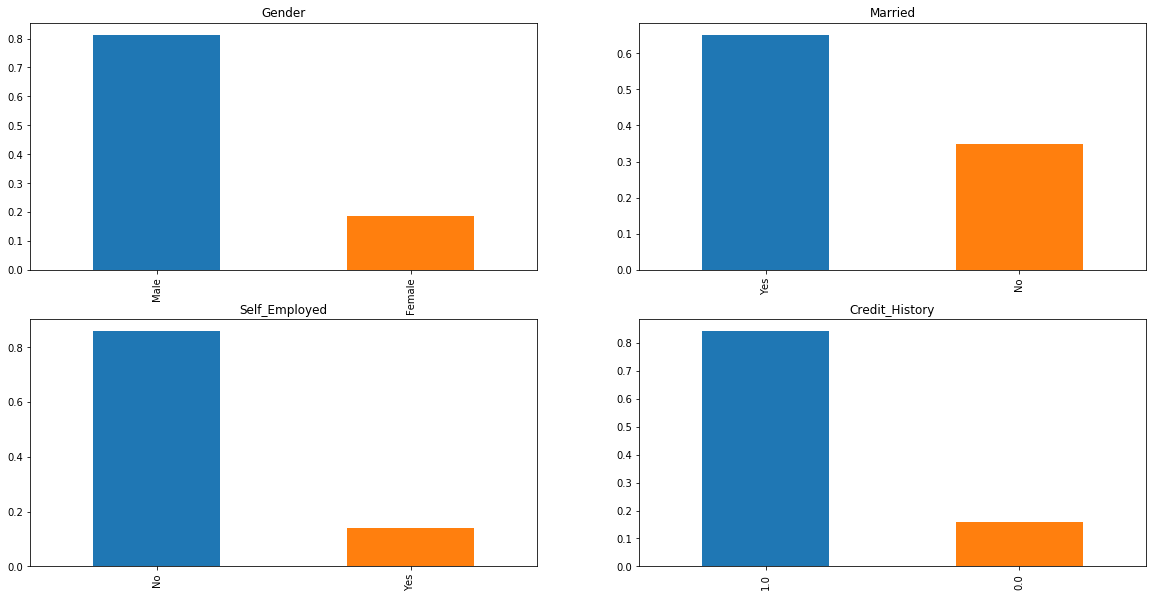

In [14]:
plt.figure(1)

plt.subplot(221)
train1['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Gender')

plt.subplot(222)
train1['Married'].value_counts(normalize=True).plot.bar(title= 'Married')


plt.subplot(223)
train1['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train1['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

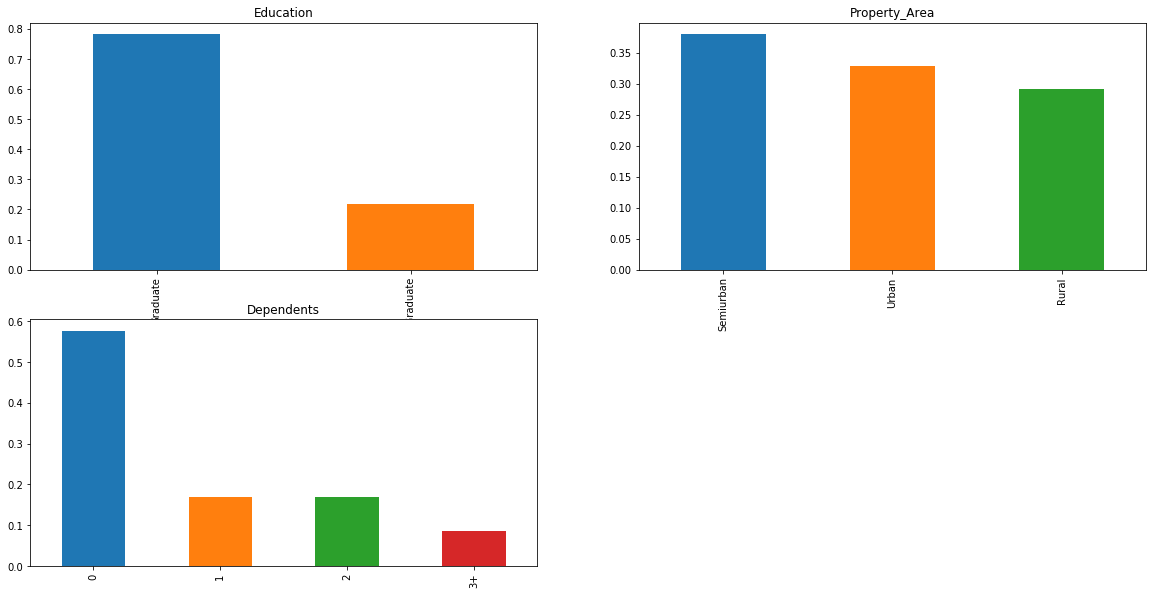

In [15]:
plt.figure(1)

plt.subplot(221)
train1['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Education')

plt.subplot(222)
train1['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.subplot(223)
train1['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.show()

In [ ]:
# FINAL INTERPRETATION  FOR CATEGORICAL VALUES 
# There are many semiurban people followed by urban and rural.
# Mnay of them are not employed but graduated
# there are 43% of people who have dependents in their family  

In [ ]:
# FINAL INTERPRETATION  FOR CONTINOUS VARIABLES 

In [ ]:
# Applicants with high income should have more chances of loan approval.
# Applicants who have repaid their previous debts should have higher chances of loan approval.
# Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
# Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [16]:
train1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# We observe that there are many missing values. Now we are going to replace the categorical values by most occuring value and numerical values by median. 
# Replacing missing values 
train1['Gender'].fillna(train1['Gender'].mode()[0], inplace=True)
train1['Married'].fillna(train1['Married'].mode()[0], inplace=True)
train1['Dependents'].fillna(train1['Dependents'].mode()[0], inplace=True)
train1['Self_Employed'].fillna(train1['Self_Employed'].mode()[0], inplace=True)
train1['Credit_History'].fillna(train1['Credit_History'].mode()[0], inplace=True)

In [18]:
train1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train1['LoanAmount'].median()

128.0

In [20]:
# Replacing missing values with median values 
train1['LoanAmount'].fillna(128,inplace = True)

In [21]:
train1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
train1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
train1['Loan_Amount_Term'].mean()

342.0

In [24]:
train1['Loan_Amount_Term'].median()

360.0

In [25]:
# Replacing missing values with median values 
train1['Loan_Amount_Term'].fillna(360,inplace = True)

In [26]:
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
# Finally there are no missing values in our train data set 
# We can apply the same thing for test data set 
test1['Gender'].fillna(test1['Gender'].mode()[0], inplace=True)
test1['Married'].fillna(test1['Married'].mode()[0], inplace=True)
test1['Dependents'].fillna(test1['Dependents'].mode()[0], inplace=True)
test1['Self_Employed'].fillna(test1['Self_Employed'].mode()[0], inplace=True)
test1['Credit_History'].fillna(test1['Credit_History'].mode()[0], inplace=True)

In [28]:
test1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
test1['Loan_Amount_Term'].mean()

342.53739612188366

In [30]:
test1['Loan_Amount_Term'].median()

360.0

In [31]:
test1['LoanAmount'].mean()

136.13259668508286

In [32]:
test1['LoanAmount'].median()

125.0

In [33]:
test1['LoanAmount'].fillna(125,inplace = True)

In [34]:
test1['Loan_Amount_Term'].fillna(360,inplace = True)

In [35]:
test1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [36]:
train1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
train2=train1.drop('Loan_ID',axis=1)
test2=test1.drop('Loan_ID',axis=1)

In [38]:
X = train2.drop('Loan_Status',1)
y = train2.Loan_Status

In [39]:
X.shape

(614, 11)

In [40]:
y.head(5)

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [41]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [42]:
X=pd.get_dummies(X)
train2=pd.get_dummies(train2)
test2=pd.get_dummies(test2)

In [43]:
X.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [44]:
from sklearn import preprocessing

In [45]:
train2['Total_Income']=train2['ApplicantIncome']+train2['CoapplicantIncome']
test2['Total_Income']=test2['ApplicantIncome']+test2['CoapplicantIncome']

In [46]:
train2.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_N                uint8
Loan_Status_Y                uint8
Total_Income               float64
dtype: object

In [47]:
train2['EMI']=train2['LoanAmount']/train2['Loan_Amount_Term']
test2['EMI']=test2['LoanAmount']/test2['Loan_Amount_Term']

In [48]:
train2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,5849.0,0.355556
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,6091.0,0.355556
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,1,0,1,3000.0,0.183333
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,1,1,0,0,0,1,0,1,4941.0,0.333333
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,6000.0,0.391667


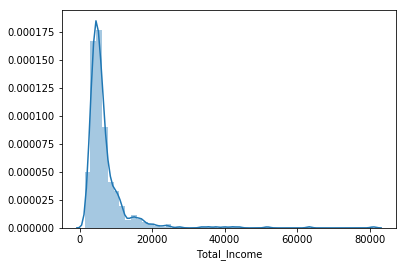

In [49]:
sns.distplot(train2['Total_Income'])

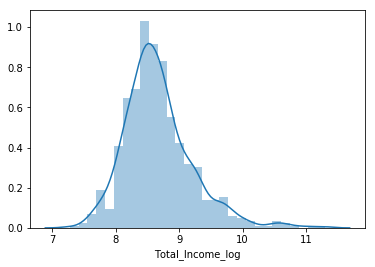

In [50]:
train2['Total_Income_log'] = np.log(train2['Total_Income'])
sns.distplot(train2['Total_Income_log']);
test2['Total_Income_log'] = np.log(test2['Total_Income'])

In [51]:
train2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,0,1,5849.0,0.355556,8.674026
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,6091.0,0.355556,8.714568
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,1,3000.0,0.183333,8.006368
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,1,0,0,0,1,0,1,4941.0,0.333333,8.505323
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,0,1,6000.0,0.391667,8.699515


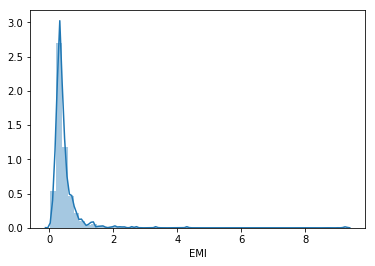

In [52]:
sns.distplot(train2['EMI'])

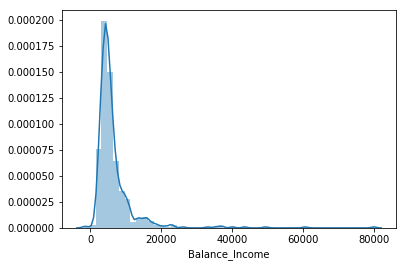

In [53]:
train2['Balance_Income']=train2['Total_Income']-(train2['EMI']*1000) # Multiply with 1000 to make the units equal 
test2['Balance_Income']=test2['Total_Income']-(test2['EMI']*1000)
sns.distplot(train2['Balance_Income'])

In [54]:
train2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,...,0,0,0,1,0,1,5849.0,0.355556,8.674026,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,6091.0,0.355556,8.714568,5735.444444
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,1,3000.0,0.183333,8.006368,2816.666667
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,0,1,0,1,4941.0,0.333333,8.505323,4607.666667
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,0,0,1,0,1,6000.0,0.391667,8.699515,5608.333333


In [55]:
train2=train2.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test2=test2.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [56]:
train2.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,5849.0,0.355556,8.674026,5493.444444
1,1.0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,6091.0,0.355556,8.714568,5735.444444
2,1.0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,1,3000.0,0.183333,8.006368,2816.666667
3,1.0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,4941.0,0.333333,8.505323,4607.666667
4,1.0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,6000.0,0.391667,8.699515,5608.333333


In [57]:
X.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [58]:
y.head(5)

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [60]:
X1 = train2
y1 = y    

In [61]:
X1.shape

(614, 22)

In [62]:
tincome = X1.Total_Income

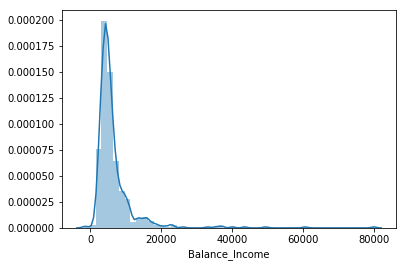

In [63]:
sns.distplot(X1['Balance_Income'])

In [64]:
train2['Balance_Income_log'] = np.log(train2['Balance_Income'])
#sns.distplot(train2['Total_Income_log']);
test2['Balance_Income_log'] = np.log(test2['Balance_Income'])

In [65]:
X1['Balance_Income_log'] = np.log(X1['Balance_Income'])

In [66]:
X1.shape

(614, 23)

In [67]:
X1.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income,Balance_Income_log
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,5849.0,0.355556,8.674026,5493.444444,8.611311
1,1.0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,6091.0,0.355556,8.714568,5735.444444,8.654421
2,1.0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,1,3000.0,0.183333,8.006368,2816.666667,7.943309
3,1.0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,1,4941.0,0.333333,8.505323,4607.666667,8.435477
4,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,6000.0,0.391667,8.699515,5608.333333,8.632009


In [69]:
train2['EMI_log'] = np.log(train2['EMI'])
test2['EMI_log'] = np.log(test2['EMI'])

In [70]:
X1.shape,train2.shape

((614, 24), (614, 24))

In [71]:

test2=test2.drop(['EMI_log'], axis=1)
train2=train2.drop(['EMI_log'], axis=1)

In [72]:
X1.shape,train2.shape

((614, 24), (614, 23))

In [73]:
X1.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income,Balance_Income_log,EMI_log
0,1.0,0,1,1,0,1,0,0,0,1,...,0,1,0,1,5849.0,0.355556,8.674026,5493.444444,8.611311,-1.034074
1,1.0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,6091.0,0.355556,8.714568,5735.444444,8.654421,-1.034074
2,1.0,0,1,0,1,1,0,0,0,1,...,0,1,0,1,3000.0,0.183333,8.006368,2816.666667,7.943309,-1.696449
3,1.0,0,1,0,1,1,0,0,0,0,...,0,1,0,1,4941.0,0.333333,8.505323,4607.666667,8.435477,-1.098612
4,1.0,0,1,1,0,1,0,0,0,1,...,0,1,0,1,6000.0,0.391667,8.699515,5608.333333,8.632009,-0.937344


In [74]:
X1=X1.drop(['EMI_log'], axis=1)

In [75]:
X1.shape,train2.shape,test2.shape

((614, 23), (614, 23), (367, 21))

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
X1.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income,Balance_Income_log
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,5849.0,0.355556,8.674026,5493.444444,8.611311
1,1.0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,6091.0,0.355556,8.714568,5735.444444,8.654421
2,1.0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,1,3000.0,0.183333,8.006368,2816.666667,7.943309
3,1.0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,1,4941.0,0.333333,8.505323,4607.666667,8.435477
4,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,6000.0,0.391667,8.699515,5608.333333,8.632009


In [79]:
X1['Credit_History'] = round(X1['Credit_History'])

In [80]:
X1.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income,Balance_Income_log
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,5849.0,0.355556,8.674026,5493.444444,8.611311
1,1.0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,6091.0,0.355556,8.714568,5735.444444,8.654421
2,1.0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,1,3000.0,0.183333,8.006368,2816.666667,7.943309
3,1.0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,1,4941.0,0.333333,8.505323,4607.666667,8.435477
4,1.0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,1,6000.0,0.391667,8.699515,5608.333333,8.632009


In [81]:
X1.isnull().sum()

Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
Total_Income               0
EMI                        0
Total_Income_log           0
Balance_Income             0
Balance_Income_log         2
dtype: int64

In [82]:
X1=X1.drop(['Balance_Income_log'], axis=1)
test2=test2.drop(['Balance_Income_log'], axis=1)
train2=train2.drop(['Balance_Income_log'], axis=1)

In [83]:
test2.shape, train2.shape, X1.shape

((367, 20), (614, 22), (614, 22))

In [84]:
test2.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI,Total_Income_log,Balance_Income
0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,5720,0.305556,8.651724,5414.444444
1,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,4576,0.350000,8.428581,4226.000000
2,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,6800,0.577778,8.824678,6222.222222
3,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,4886,0.277778,8.494129,4608.222222
4,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,3276,0.216667,8.094378,3059.333333


In [85]:
train2.head(4)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,EMI,Total_Income_log,Balance_Income
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,5849.0,0.355556,8.674026,5493.444444
1,1.0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,6091.0,0.355556,8.714568,5735.444444
2,1.0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,1,3000.0,0.183333,8.006368,2816.666667
3,1.0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,4941.0,0.333333,8.505323,4607.666667


In [189]:
X1.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,EMI,Total_Income_log
0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0.355556,8.674026
1,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0.355556,8.714568
2,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.183333,8.006368
3,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0.333333,8.505323
4,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0.391667,8.699515


In [86]:
train2=train2.drop(['Loan_Status_N','Loan_Status_Y','Balance_Income','Total_Income'], axis=1)

In [87]:
X1=X1.drop(['Loan_Status_N','Loan_Status_Y','Balance_Income','Total_Income'], axis=1)

In [88]:
X1.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,EMI,Total_Income_log
0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.355556,8.674026
1,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0.355556,8.714568
2,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0.183333,8.006368
3,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0.333333,8.505323
4,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.391667,8.699515


In [89]:
test2.shape, train2.shape, X1.shape

((367, 20), (614, 18), (614, 18))

In [90]:
test2.head(5)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI,Total_Income_log,Balance_Income
0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,5720,0.305556,8.651724,5414.444444
1,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,4576,0.350000,8.428581,4226.000000
2,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,6800,0.577778,8.824678,6222.222222
3,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,4886,0.277778,8.494129,4608.222222
4,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,3276,0.216667,8.094378,3059.333333


In [91]:
test2=test2.drop(['Balance_Income','Total_Income'], axis=1)

In [92]:
test2.shape, train2.shape, X1.shape

((367, 18), (614, 18), (614, 18))

# Using Stratified K-FOLD Cross Validation 

In [93]:
score1 = 0
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train1_index,test1_index in kf.split(X1,y1):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.loc[train1_index],X1.loc[test1_index]
     ytr,yvl = y1[train1_index],y1[test1_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     score1 = score + score1
     print('accuracy_score',score)
     i+=1
pred_test_sk = model.predict(test2)
pred_sk=model.predict_proba(xvl)[:,1]
print("\n Average Accuracy is {}" .format(score1/10))


1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.8095238095238095

3 of kfold 10
accuracy_score 0.8360655737704918

4 of kfold 10
accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.8360655737704918

7 of kfold 10
accuracy_score 0.8032786885245902

8 of kfold 10
accuracy_score 0.7540983606557377

9 of kfold 10
accuracy_score 0.819672131147541

10 of kfold 10
accuracy_score 0.8524590163934426

 Average Accuracy is 0.8095498308613063


In [94]:
submission=pd.read_csv("Sample_Submission.csv")

In [95]:
submission['Loan_Status']=pred_test_sk
submission['Loan_ID']=test['Loan_ID']

In [96]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [97]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic_fsk.csv')

In [98]:
new=pd.read_csv("Logistic_fsk.csv")
new.head(5)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [99]:
from sklearn import tree

In [104]:
i=1
sc=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train1_index,test1_index in kf.split(X1,y1):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.loc[train1_index],X1.loc[test1_index]
     ytr,yvl = y1[train1_index],y1[test1_index]               
     
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     sc = sc + score
     print('accuracy_score',score)
     i+=1
pred_test_dt = model.predict(test2)
print("\n Average Accuracy for Decision Tree is {}" .format(sc/10))


1 of kfold 10
accuracy_score 0.6984126984126984

2 of kfold 10
accuracy_score 0.7777777777777778

3 of kfold 10
accuracy_score 0.6721311475409836

4 of kfold 10
accuracy_score 0.7377049180327869

5 of kfold 10
accuracy_score 0.6885245901639344

6 of kfold 10
accuracy_score 0.7213114754098361

7 of kfold 10
accuracy_score 0.7049180327868853

8 of kfold 10
accuracy_score 0.6885245901639344

9 of kfold 10
accuracy_score 0.7540983606557377

10 of kfold 10
accuracy_score 0.7213114754098361

 Average Accuracy for Decision Tree is 0.7164715066354411


In [105]:
submission1=pd.read_csv("Sample_Submission.csv")

In [106]:
submission1['Loan_Status']=pred_test_dt
submission1['Loan_ID']=test['Loan_ID']

In [107]:
submission1['Loan_Status'].replace(0, 'N',inplace=True)
submission1['Loan_Status'].replace(1, 'Y',inplace=True)

In [108]:
pd.DataFrame(submission1, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')

In [109]:
new=pd.read_csv("DecisionTree.csv")
new.head(5)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,N
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,N


In [ ]:
# Logistic has given higher accuracy than decision tree algorithm 
# Now I am going for Random Forest Algorithm 

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
i=1
sc1=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train1_index,test1_index in kf.split(X1,y1):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.loc[train1_index],X1.loc[test1_index]
     ytr,yvl = y1[train1_index],y1[test1_index]        
                
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     sc1 = sc1 + score   
     print('accuracy_score',score)
     i+=1
pred_test_rf = model.predict(test2)
print("\n Average Accuracy for Random Forest  is {}" .format(sc1/10))


1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.7142857142857143

3 of kfold 10
accuracy_score 0.819672131147541

4 of kfold 10
accuracy_score 0.7704918032786885

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.7213114754098361

7 of kfold 10
accuracy_score 0.7213114754098361

8 of kfold 10
accuracy_score 0.7213114754098361

9 of kfold 10
accuracy_score 0.819672131147541

10 of kfold 10
accuracy_score 0.7868852459016393

 Average Accuracy for Random Forest  is 0.7623211033047098


In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [114]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X1,y1, test_size =0.3, random_state=1)

In [116]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [119]:
i=1
sc1=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train1_index,test1_index in kf.split(X1,y1):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.loc[train1_index],X1.loc[test1_index]
     ytr,yvl = y1[train1_index],y1[test1_index]        
                
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators = 21)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     sc1 = sc1 + score   
     print('accuracy_score',score)
     i+=1
pred_test_rf1 = model.predict(test2)
print("\n Average Accuracy for Random Forest with optimised estimators   is {}" .format(sc1/10))


1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.8095238095238095

3 of kfold 10
accuracy_score 0.8360655737704918

4 of kfold 10
accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.8360655737704918

7 of kfold 10
accuracy_score 0.819672131147541

8 of kfold 10
accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.8360655737704918

10 of kfold 10
accuracy_score 0.8524590163934426

 Average Accuracy for Random Forest with optimised estimators   is 0.8144678636481915


In [120]:
submission2=pd.read_csv("Sample_Submission.csv")

In [121]:
submission2['Loan_Status']=pred_test_rf1
submission2['Loan_ID']=test['Loan_ID']

In [122]:
submission2['Loan_Status'].replace(0, 'N',inplace=True)
submission2['Loan_Status'].replace(1, 'Y',inplace=True)

In [123]:
pd.DataFrame(submission2, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest_MV.csv')

In [124]:
new=pd.read_csv("RandomForest_MV.csv")
new.head(5)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


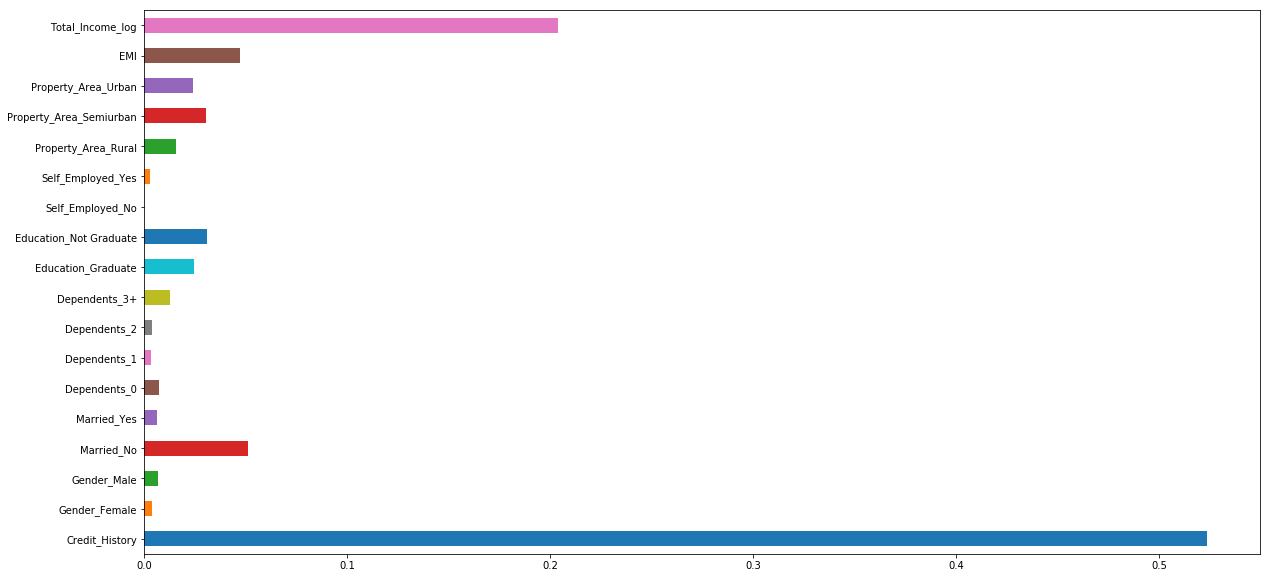

In [125]:
importances=pd.Series(model.feature_importances_, index=X1.columns)
importances.plot(kind='barh', figsize=(20,10))

In [127]:
!pip install xgboost

    100% |████████████████████████████████| 16.6MB 146kB/s ta 0:00:011


In [128]:
from xgboost import XGBClassifier

In [130]:
i=1
sc2=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train1_index,test1_index in kf.split(X1,y1):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.loc[train1_index],X1.loc[test1_index]
     ytr,yvl = y1[train1_index],y1[test1_index]
        
        
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     sc2 = sc2 + score   
     print('accuracy_score',score)
     i+=1
pred_test_xgb = model.predict(test2)
#pred3=model.predict_proba(test)[:,1]
print("\n Average Accuracy for XG BOOST with optimised estimators   is {}" .format(sc2/10))


1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.7777777777777778

3 of kfold 10


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.8032786885245902

4 of kfold 10
accuracy_score 0.819672131147541

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.819672131147541

7 of kfold 10
accuracy_score 0.8032786885245902

8 of kfold 10
accuracy_score 0.7540983606557377

9 of kfold 10


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.819672131147541

10 of kfold 10
accuracy_score 0.819672131147541

 Average Accuracy for XG BOOST with optimised estimators   is 0.7965391621129327


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
submission3=pd.read_csv("Sample_Submission.csv")

In [133]:
submission3['Loan_Status']=pred_test_xgb
submission3['Loan_ID']=test['Loan_ID']
submission3['Loan_Status'].replace(0, 'N',inplace=True)
submission3['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission3, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [134]:
new=pd.read_csv("XGBoost.csv")
new.head(5)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [135]:
grid_search1=GridSearchCV(XGBClassifier(random_state=1),paramgrid)

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X1,y1, test_size =0.3, random_state=1)

In [137]:
grid_search1.fit(x_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
grid_search1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=81,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [142]:
i=1
sc3=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train1_index,test1_index in kf.split(X1,y1):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.loc[train1_index],X1.loc[test1_index]
     ytr,yvl = y1[train1_index],y1[test1_index]
        
        
     model = XGBClassifier(n_estimators=81, max_depth=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     sc3 = sc3 + score   
     print('accuracy_score',score)
     i+=1
pred_test_xgbopt = model.predict(test2)
#pred3=model.predict_proba(test)[:,1]
print("\n Average Accuracy for XG BOOST with optimised estimators   is {}" .format(sc3/10))


1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.8095238095238095

3 of kfold 10
accuracy_score 0.8360655737704918

4 of kfold 10


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.8360655737704918

7 of kfold 10
accuracy_score 0.819672131147541

8 of kfold 10


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.8360655737704918

10 of kfold 10
accuracy_score 0.8524590163934426

 Average Accuracy for XG BOOST with optimised estimators   is 0.8144678636481915


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [141]:
submission4=pd.read_csv("Sample_Submission.csv")

In [143]:
submission4['Loan_Status']=pred_test_xgbopt
submission4['Loan_ID']=test['Loan_ID']
submission4['Loan_Status'].replace(0, 'N',inplace=True)
submission4['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission3, columns=['Loan_ID','Loan_Status']).to_csv('XGBoostOptimised.csv')

In [144]:
new=pd.read_csv("XGBoostOptimised.csv")
new.head(5)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
